In [2]:
import pandas as pd
Ecom_data = pd.read_csv("Ecom_Cust_Survey_v1.csv")
Ecom_data.head(2)

,Cust_num,Region,Age,Order_Quantity,Customer_Type,Overall_Satisfaction
0,1,1,45,24,Prime,Dis Satisfied
1,2,0,20,75,Prime,Satisfied


In [3]:
Ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust_num              11805 non-null  int64 
 1   Region                11805 non-null  int64 
 2   Age                   11805 non-null  int64 
 3   Order_Quantity        11805 non-null  int64 
 4   Customer_Type         11805 non-null  object
 5   Overall_Satisfaction  11805 non-null  object
dtypes: int64(4), object(2)
memory usage: 553.5+ KB


In [8]:
Ecom_data.describe()

,Cust_num,Region,Age,Order_Quantity
count,11805.000000,11805.000000,11805.000000,11805.000000
mean,5903.000000,0.495383,41.748751,41.227531
std,3407.954298,0.500000,13.853449,26.235388
min,1.000000,0.000000,18.000000,5.000000
25%,2952.000000,0.000000,32.000000,21.000000
50%,5903.000000,0.000000,40.000000,34.000000
75%,8854.000000,1.000000,52.000000,60.000000
max,11805.000000,1.000000,70.000000,100.000000


In [11]:
#Checking category wise Prime customers & Non prime customer's dissatisfaction
Ecom_data[["Customer_Type","Overall_Satisfaction"]].value_counts()

,,count
Customer_Type,Overall_Satisfaction,
Prime,Satisfied,4230
Non_Prime,Dis Satisfied,3834
Prime,Dis Satisfied,2574
Non_Prime,Satisfied,1167


In [45]:
#Label_Encoding
#Assigning numerical label to text feild

Ecom_data['Customer_Type_num'] = Ecom_data['Customer_Type'].map({'Prime': 1, 'Non_Prime': 0}).astype(int).astype(int)
print(Ecom_data['Customer_Type'].value_counts())
print(Ecom_data['Customer_Type_num'].value_counts())


Customer_Type
Prime        6804
Non_Prime    5001
Name: count, dtype: int64
Customer_Type_num
1    6804
0    5001
Name: count, dtype: int64


In [47]:
#Label_Encoding for Satisfied & Dis satisfied Customers
Ecom_data["Overall_Satisfaction_num"] = Ecom_data["Overall_Satisfaction"].map({"Dis Satisfied" : 0 , "Satisfied" : 1}).astype(int).astype(int)
print(Ecom_data["Overall_Satisfaction_num"].value_counts())
print(Ecom_data["Overall_Satisfaction"].value_counts())

Overall_Satisfaction_num
0    6408
1    5397
Name: count, dtype: int64
Overall_Satisfaction
Dis Satisfied    6408
Satisfied        5397
Name: count, dtype: int64


In [51]:
Ecom_data.columns

Index(['Cust_num', 'Region', 'Age', 'Order_Quantity', 'Customer_Type',
       'Overall_Satisfaction', 'Customer_Type_num',
       'Overall_Satisfaction_num'],
      dtype='object')

In [52]:
from sklearn import tree
features = ["Region","Age" , "Order_Quantity" , "Customer_Type"]
print("Features",features)

X=Ecom_data[features]
print("x shape",X.shape)
y=Ecom_data["Overall_Satisfaction"]
print("y shape",y.shape)

Features ['Region', 'Age', 'Order_Quantity', 'Customer_Type']
x shape (11805, 4)
y shape (11805,)


In [53]:
#Building Model i.e. Tree
Decision_Tree = tree.DecisionTreeClassifier(max_depth=2)
Decision_Tree.fit(X,y)

ValueError: could not convert string to float: 'Prime'

In [29]:
#Printing_Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text
plt.figure(figsize=(15,7))
plot_tree(Decision_Tree,filled=True,
                        rounded=True,
                        impurity=False,
                        feature_names=features)
print(export_text(Decision_Tree,feature_names=features))

ValueError: could not convert string to float: 'Prime'

In [55]:
# Encode 'Region' using one-hot encoding
Ecom_data = pd.get_dummies(Ecom_data, columns=["Region"], drop_first=True)

# Use encoded Customer_Type and Overall_Satisfaction
features = ["Age", "Order_Quantity", "Customer_Type_num"] + [col for col in Ecom_data.columns if "Region_" in col]
X = Ecom_data[features]
y = Ecom_data["Overall_Satisfaction_num"]

# Fit the decision tree
from sklearn import tree
Decision_Tree = tree.DecisionTreeClassifier(max_depth=2)
Decision_Tree.fit(X, y)


DecisionTreeClassifier(max_depth=2)

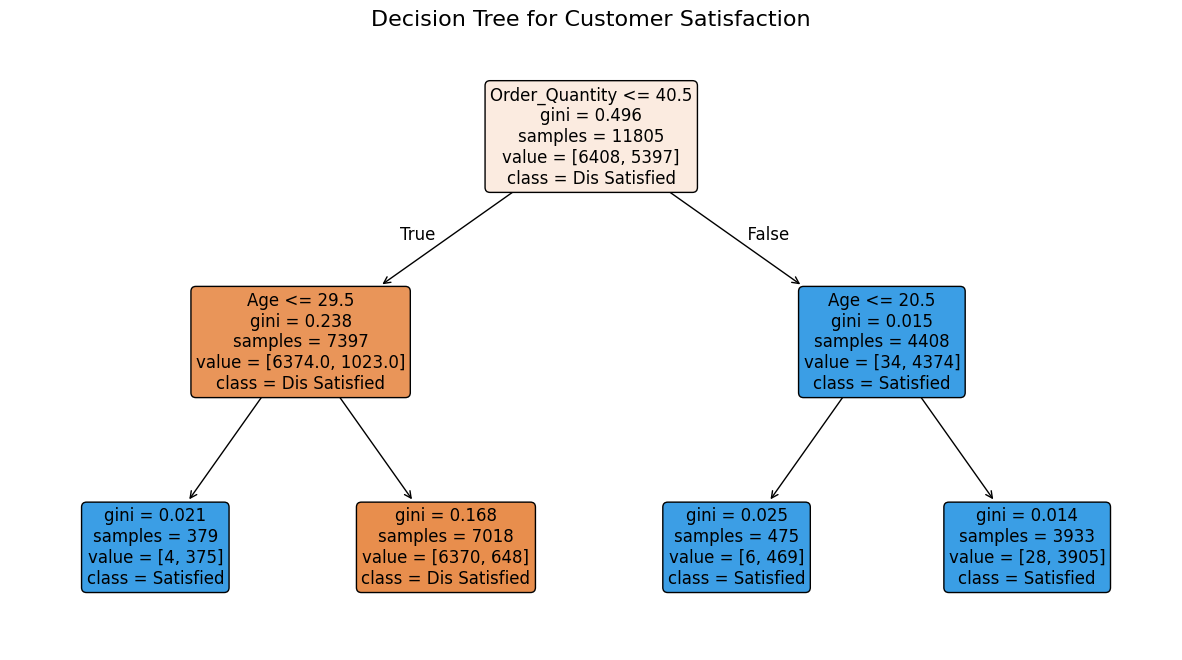

In [56]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plotting the decision tree
plt.figure(figsize=(15, 8))

tree.plot_tree(
    Decision_Tree,
    feature_names=X.columns,
    class_names=["Dis Satisfied", "Satisfied"],
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Decision Tree for Customer Satisfaction", fontsize=16)
plt.show()